In [1]:
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# Multi-class text classification using LSTM on consumer complaints
import pandas as pd
df = pd.read_csv('consumer_complaints_1000.csv',sep=';') #Has 10k row (original has 70k).
df = df.drop(df.iloc[:, 18:65],axis = 1) #deleting 18-64 indexed unnamed columns
df.head(10)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Diversified Consultants,"Inc.""",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516,NaN,NaN,NaN,NaN
2,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492,NaN,NaN,NaN,NaN,NaN
4,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,In early XX/XX/XXXX I began the Loan Modificat...,though at the time I started to inquire for a...,I began working with a program called XXXX. T...,so it took 2 months from the time I started t...,my caseworker with WFB,failed to tell me that since the payments dur...,she chose to withhold this information and da...,going on 6 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137,NaN,NaN,NaN,NaN,NaN
9,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,Experian is reporting my OPEN and CURRENT Mort...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [3]:
df = df[df['consumer_complaint_narrative'].notna()] #If consumer complaint narrative is nan delete that row
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date_received                 6574 non-null   object
 1   product                       7999 non-null   object
 2   sub_product                   8478 non-null   object
 3   issue                         9994 non-null   object
 4   sub_issue                     7118 non-null   object
 5   consumer_complaint_narrative  9999 non-null   object
 6   company_public_response       1975 non-null   object
 7   company                       3807 non-null   object
 8   state                         3697 non-null   object
 9   zipcode                       3634 non-null   object
 10  tags                          3584 non-null   object
 11  consumer_consent_provided     3552 non-null   object
 12  submitted_via                 3527 non-null   object
 13  date_sent_to_compa

In [4]:
df.head(10)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Diversified Consultants,"Inc.""",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516,NaN,NaN,NaN,NaN
2,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492,NaN,NaN,NaN,NaN,NaN
4,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,In early XX/XX/XXXX I began the Loan Modificat...,though at the time I started to inquire for a...,I began working with a program called XXXX. T...,so it took 2 months from the time I started t...,my caseworker with WFB,failed to tell me that since the payments dur...,she chose to withhold this information and da...,going on 6 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137,NaN,NaN,NaN,NaN,NaN
9,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,Experian is reporting my OPEN and CURRENT Mort...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['product'].value_counts()

Debt collection                                                                                                                                                                                                                                                                                                                                                                1684
Mortgage                                                                                                                                                                                                                                                                                                                                                                       1358
Credit reporting                                                                                                                                                                                                                                                

In [6]:
df.loc[df['product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df['product'] != 'Other financial service']

In [7]:
#After consolidation we have 8 labels
df["product"].value_counts().sort_values(ascending=False).count()

762

In [8]:
#Text preprocessing
#Convert all text to lower case.
#Replace REPLACE_BY_SPACE_RE symbols by space in text.
#Remove symbols that are in BAD_SYMBOLS_RE from text.
#Remove “x” in text.
#Remove stop words.
#Remove digits in text.

import re #regex
import nltk #nlp library
from nltk.corpus import stopwords

df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

#text is a string, returns modified initial string
def clean_text(text):
    
    text = str(text)
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(clean_text)
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].str.replace('\d+', '')

In [9]:
from keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['consumer_complaint_narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 13067 unique tokens.


In [13]:
#Truncate and pad the input sequences so that they are all in the same length for modeling.
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['consumer_complaint_narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (9988, 250)


In [14]:
#Converting categorical labels to numbers.
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (9988, 3)


In [15]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8989, 250) (8989, 3)
(999, 250) (999, 3)


In [16]:
#The first layer is the embedded layer that uses 100 length vectors to represent each word.
#SpatialDropout1D performs variational dropout in NLP models.
#The next layer is the LSTM layer with 100 memory units.
#The output layer must create 13 output values, one for each class.
#Activation function is softmax for multi-class classification.
#Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

from keras.models import Sequential
from keras.layers import Embedding,SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
127/127 [==============================] - 192s 1s/step - loss: 0.1502 - accuracy: 0.0907 - val_loss: 0.1502 - val_accuracy: 0.0812
Epoch 2/5
127/127 [==============================] - 181s 1s/step - loss: 0.1474 - accuracy: 0.0871 - val_loss: 0.1511 - val_accuracy: 0.0812
Epoch 3/5
127/127 [==============================] - 184s 1s/step - loss: 0.1470 - accuracy: 0.0871 - val_loss: 0.1507 - val_accuracy: 0.0812
Epoch 4/5
127/127 [==============================] - 184s 1s/step - loss: 0.1470 - accuracy: 0.0871 - val_loss: 0.1507 - val_accuracy: 0.0812


In [17]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 2s 67ms/step - loss: 0.1367 - accuracy: 0.0821
Test set
  Loss: 0.137
  Accuracy: 0.082


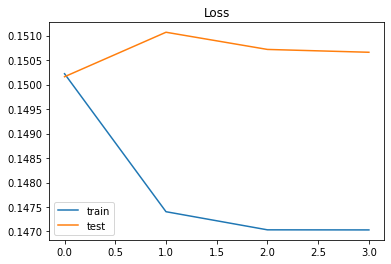

In [18]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

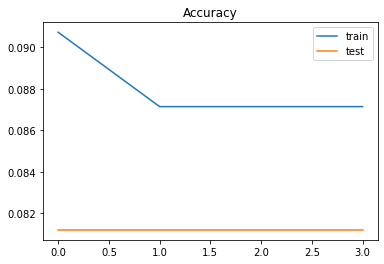

In [19]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [28]:
#Testing with new custom complaint
import numpy as np

new_complaint = ['XXXX has claimed I owe them {$270.00} for XXXX but this is not true. I already paid ']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])


1/1 [==============================] - 0s 38ms/step
[[0.32686862 0.49537665 0.17775472]] Debt collection
